# Preparing Dataset

In [ ]:
import shutil
import polars as pl
import numpy as np
import os
from fe_polars.encoding.target_encoding import TargetEncoder
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import joblib

!mkdir lokahi

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning:

Using fork() can cause Polars to deadlock in the child process.
In addition, using fork() with Python in general is a recipe for mysterious
deadlocks and crashes.

The most likely reason you are seeing this error is because you are using the
multiprocessing module on Linux, which uses fork() by default. This will be
fixed in Python 3.14. Until then, you want to use the "spawn" context instead.

See https://docs.pola.rs/user-guide/misc/multiprocessing/ for details.




mkdir: cannot create directory 'lokahi': File exists


In [ ]:
shutil.unpack_archive('Lokahi_Innovation_in_Healthcare_Hackahton.zip.zip', 'lokahi/')

In [6]:
def combine_parquet(dir_path):
  files = os.listdir(dir_path)
  filtered_files = [os.path.join(dir_path,file) for file in files if file.endswith('.parquet')]

  lazy_frames = [pl.read_parquet(file).lazy() for file in filtered_files]
  combined_frame = pl.concat(lazy_frames)

  return combined_frame.collect()

data_dict = {
    'member':combine_parquet('lokahi/Lokahi_Innovation_in_Healthcare_Hackahton/Claims_Member'),
    'provider':combine_parquet('lokahi/Lokahi_Innovation_in_Healthcare_Hackahton/Claims_Provider'),
    'services':combine_parquet('lokahi/Lokahi_Innovation_in_Healthcare_Hackahton/Claims_Services'),
    'enrollment':combine_parquet('lokahi/Lokahi_Innovation_in_Healthcare_Hackahton/Claims_Enrollment')
}

## EDA

## Enrollment

In [7]:
data_dict['enrollment'].head()

PRIMARY_PERSON_KEY,MEMBER_ID,MEMBER_MONTH_START_DATE,YEARMO,MEM_AGE,RELATION,MEM_MSA_NAME,PAYER_LOB,PAYER_TYPE,PROD_TYPE,QTY_MM_MD,QTY_MM_RX,QTY_MM_DN,QTY_MM_VS,MEM_STAT,PRIMARY_CHRONIC_CONDITION_ROLLUP_ID,PRIMARY_CHRONIC_CONDITION_ROLLUP_DESC
str,str,date,str,str,str,str,str,str,str,f32,f32,f32,f32,str,i32,str
"""1E9F89247B2EA224292BDA829""","""1E9F89247B2EA224292BDA829""",2022-12-01,"""202212""","""22""","""DEPENDENT""","""NON-MSA AREA, HI""","""COMMERCIAL""","""PPO""","""MEDICAL""",1.0,0.0,0.0,0.0,"""ACTIVE""",130,"""130 - HEALTHY MALE (16-40)"""
"""D1EF2D981338A9E0576D2B2B5""","""D1EF2D981338A9E0576D2B2B5""",2024-01-01,"""202401""","""53""","""SUBSCRIBER""","""SALINAS, CA""","""MEDICAID""","""MLI""","""MEDICAL""",1.0,0.0,0.0,0.0,null,131,"""131 - HEALTHY MALE (41-64)"""
"""7965E84FF729EE6EC7AF3107F""","""7965E84FF729EE6EC7AF3107F""",2024-06-01,"""202406""","""72""","""SUBSCRIBER""","""SAGINAW, MI""","""MEDICARE SUPPLEMENT""","""MS""","""DENTAL""",0.0,0.0,1.0,0.0,null,104,"""104 - RENAL FAILURE AND/OR POS…"
"""D7A1B231B24EF5A687C581085""","""D7A1B231B24EF5A687C581085""",2022-09-01,"""202209""","""32""",null,"""DETROIT-DEARBORN-LIVONIA, MI""","""MEDICAID""","""ME""","""RX""",0.0,1.0,0.0,0.0,"""ACTIVE""",138,"""138 - HEALTHY FEMALE (16-40)"""
"""272B94FB4B3A6D6C646B91349""","""272B94FB4B3A6D6C646B91349""",2024-06-01,"""202406""","""62""","""SUBSCRIBER""","""FLINT, MI""","""MEDICAID""","""MLI""","""VISION""",0.0,0.0,0.0,1.0,"""ACTIVE""",113,"""113 - HYPERTENSION (INCLUDES S…"


In [8]:
enrollment_null = (data_dict['enrollment'].null_count() / data_dict['enrollment'].shape[0]).unpivot()
enrollment_null.sort(by = pl.col('value'),descending = True)[:10]

variable,value
str,f64
"""RELATION""",0.406088
"""MEM_STAT""",0.246006
"""PRIMARY_CHRONIC_CONDITION_ROLL…",0.019709
"""PRIMARY_CHRONIC_CONDITION_ROLL…",0.019709
"""MEM_AGE""",0.003835
"""MEM_MSA_NAME""",0.000167
"""PRIMARY_PERSON_KEY""",0.0
"""MEMBER_ID""",0.0
"""MEMBER_MONTH_START_DATE""",0.0


In [9]:
filtered_enrollment = data_dict['enrollment'].select(['MEMBER_ID','MEM_AGE','PAYER_LOB','QTY_MM_MD','PRIMARY_CHRONIC_CONDITION_ROLLUP_DESC','PRIMARY_CHRONIC_CONDITION_ROLLUP_ID'])

## Member

In [10]:
data_dict['member'].head()

PRIMARY_PERSON_KEY,MEMBER_ID,MEM_GENDER,MEM_RACE,MEM_ETHNICITY,MEM_ZIP3,MEM_MSA_NAME,MEM_STATE
str,str,str,str,str,str,str,str
"""9731B1DE12C33F077C1735813""","""9731B1DE12C33F077C1735813""","""F""",null,null,"""481""","""DETROIT-DEARBORN-LIVONIA, MI""","""MI"""
"""9747230E0A5222636D181EE17""","""9747230E0A5222636D181EE17""","""M""",null,null,"""486""","""SAGINAW, MI""","""MI"""
"""9783BC6A6639A320678AEB1D7""","""9783BC6A6639A320678AEB1D7""","""F""",null,null,"""967""","""NON-MSA AREA, HI""","""HI"""
"""97C47B1B1F0E23FB7379A5B18""","""97C47B1B1F0E23FB7379A5B18""","""M""",null,null,"""967""","""URBAN HONOLULU, HI""","""HI"""
"""97CC11A701344E64DEA25DEA4""","""97CC11A701344E64DEA25DEA4""","""M""",null,null,"""968""","""URBAN HONOLULU, HI""","""HI"""


In [11]:
member_null = (data_dict['member'].null_count() / data_dict['member'].shape[0]).unpivot()
member_null.sort(by = pl.col('value'),descending = True)

variable,value
str,f64
"""MEM_ETHNICITY""",0.567693
"""MEM_RACE""",0.526925
"""MEM_GENDER""",0.009381
"""PRIMARY_PERSON_KEY""",0.0
"""MEMBER_ID""",0.0
"""MEM_ZIP3""",0.0
"""MEM_MSA_NAME""",0.0
"""MEM_STATE""",0.0


In [12]:
filtered_member = data_dict['member'].select(['MEMBER_ID','MEM_GENDER','MEM_STATE'])

## Services

In [13]:
filtered_services = data_dict['services'].filter(pl.col('SERVICE_SETTING') == 'INPATIENT')
filtered_services.head()

PRIMARY_PERSON_KEY,MEMBER_ID,CLAIM_ID_KEY,SERVICE_LINE,SV_STAT,BILL_PROV_KEY,REF_PROV_KEY,ATT_PROV_KEY,YEARMO,FROM_DATE,TO_DATE,PAID_DATE,ADM_DATE,DIS_DATE,AGE_ON_DOS,RELATION,PAYER_LOB,PAYER_TYPE,MEM_STAT,CLAIM_IN_NETWORK,SERVICE_SETTING,FORM_TYPE,UB_BILL_TYPE,POS,MS_DRG,REV_CODE,PROC_CODE,CPT_MOD_1,CPT_MOD_2,CPT_CCS,CPT_CCS_LABEL,ADM_SRC,ADM_TYPE,DIS_STAT,ICD_DIAG_ADMIT,ICD_DIAG_01,ICD_DIAG_02,…,ICD_PROC_CODE_17,ICD_PROC_CODE_18,ICD_PROC_CODE_19,ICD_PROC_CODE_20,ICD_PROC_CODE_21,ICD_PROC_CODE_22,ICD_PROC_CODE_23,ICD_PROC_CODE_24,ICD_PROC_CODE_25,ICD_PROC_CODE_26,ICD_PROC_CODE_27,ICD_PROC_CODE_28,ICD_PROC_CODE_29,ICD_PROC_CODE_30,DIAG_CCS_1_LABEL,DIAG_CCS_2_LABEL,DIAG_CCS_3_LABEL,NDC_CODE,RX_DAYS_SUPPLY,RX_REFILLS,RX_FILL_SRC,RX_DRUG_COST,RX_INGR_COST,RX_QTY_DISPENSED,RX_DISP_FEE,RX_FORM,AMT_BILLED,AMT_ALLOWED,AMT_COB,AMT_COPAY,AMT_DEDUCT,AMT_COINS,AMT_PAID,AMT_DISALLOWED,SV_UNITS,DIAGNOSTIC_CONDITION_CATEGORY_ID,DIAGNOSTIC_CONDITION_CATEGORY_DESC
str,str,"decimal[38,0]",i32,str,str,str,str,str,date,date,date,date,date,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f32,i16,str,f32,f32,"decimal[18,2]","decimal[18,2]",i32,f64,f64,f64,f64,f64,f64,f64,f64,"decimal[12,2]",str,str
"""1EBF6146B871B3576444B506F""","""1EBF6146B871B3576444B506F""",3048793979,5,"""P""","""64F89D5EE97337669EF772765""","""081B37F0DD10CA9236269618F""","""64F89D5EE97337669EF772765""","""202212""",2022-12-11,2022-12-13,2022-12-25,2022-12-11,2022-12-13,"""23""","""SUBSCRIBER""","""COMMERCIAL""","""HMO""",null,null,"""INPATIENT""","""U""","""111""","""21""","""833""","""0259""",null,null,null,"""000""",null,"""1""","""3""","""01""",null,"""O34211""",null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""COMPLICATIONS OF PREGNANCY; CH…","""INDICATIONS FOR CARE IN PREGNA…","""PREVIOUS C-SECTION""",null,0.0,0,null,0.0,0.0,null,0.00,null,88.221759,40.963532,0.0,0.0,0.0,0.0,40.346337,0.0,11.00,"""99""","""NOT MAPPED"""
"""E90A7C9FBFF4C20B9874C3C6F""","""E90A7C9FBFF4C20B9874C3C6F""",4412694618680315379801,9,"""P""","""A608F5BBCC48E545AA1355D8D""","""9A2BD1B749839687B7C6CE5A0""","""A608F5BBCC48E545AA1355D8D""","""202211""",2022-11-24,2022-11-27,2022-12-17,2022-11-24,2022-11-27,"""38""","""UNKNOWN""","""MEDICAID""","""ME""","""ACTIVE""","""Y""","""INPATIENT""","""U""","""111""",null,"""331""","""0302""",null,null,null,"""000""",null,"""2""","""3""","""01""","""K5780""","""K5720""","""I10""",…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""DISEASES OF THE DIGESTIVE SYST…","""LOWER GASTROINTESTINAL DISORDE…","""DIVERTICULOSIS AND DIVERTICULI…",null,0.0,0,null,0.0,0.0,null,0.00,0,35.950289,0.0,0.0,0.0,0.0,0.0,0.0,36.614476,1.00,"""39""","""HTN (HYPERTENSION)"""
"""7E63F42473496156D95072ADE""","""7E63F42473496156D95072ADE""",3915323710169832784660,6,"""P""","""DE7D09C130D00580FA39B70EF""","""6C09EF937D212BB50A6A024F7""","""DE7D09C130D00580FA39B70EF""","""202210""",2022-10-01,2022-10-05,2024-02-02,2022-10-01,2022-10-05,"""35""","""UNKNOWN""","""MEDICAID""","""MD""","""ACTIVE""","""Y""","""INPATIENT""","""U""","""111""",null,"""637""","""0350""",null,null,null,"""000""",null,"""1""","""1""","""07""","""E1011""","""E1011""","""N170""",…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""ENDOCRINE; NUTRITIONAL; AND ME…","""DIABETES MELLITUS WITH COMPLIC…","""DIABETES MELLITUS WITH COMPLIC…",null,0.0,0,null,0.0,0.0,null,0.00,0,12952.566179,0.0,0.0,0.0,0.0,0.0,0.0,12930.883682,4.00,"""16""","""SUBSTANCE ABUSE"""
"""A7FF4B7843090D39AC12913E9""","""A7FF4B7843090D39AC12913E9""",487522458,14,"""P""","""B68D0B37CDF41FEEB05796492""","""635145536A5957762AB18E4C5""","""B68D0B37CDF41FEEB05796492""","""202212""",2022-12-12,2022-12-19,2023-05-14,2022-12-12,2022-12-19,"""56""","""SUBSCRIBER""","""COMMERCIAL""","""PPO""","""ACTIVE""",null,"""INPATIENT""","""U""",null,null,"""098""","""0343""",null,null

In [14]:
filtered_services = filtered_services.with_columns(
    ((pl.col("DIS_DATE") - pl.col("ADM_DATE")).cast(pl.Int64) / 86_400_000).alias("LOS")
)

In [15]:
filtered_services = filtered_services.select([
    'MEMBER_ID','DIAG_CCS_1_LABEL','MS_DRG','AGE_ON_DOS'
    'LOS','DIAG_CCS_2_LABEL','ADM_SRC',
    'ADM_TYPE','DIS_STAT','MEM_STAT'
])

filtered_services.head()

MEMBER_ID,DIAG_CCS_1_LABEL,MS_DRG,LOS,DIAG_CCS_2_LABEL,ADM_SRC,ADM_TYPE,DIS_STAT,MEM_STAT
str,str,str,f64,str,str,str,str,str
"""1EBF6146B871B3576444B506F""","""COMPLICATIONS OF PREGNANCY; CH…","""833""",2.0,"""INDICATIONS FOR CARE IN PREGNA…","""1""","""3""","""01""",null
"""E90A7C9FBFF4C20B9874C3C6F""","""DISEASES OF THE DIGESTIVE SYST…","""331""",3.0,"""LOWER GASTROINTESTINAL DISORDE…","""2""","""3""","""01""","""ACTIVE"""
"""7E63F42473496156D95072ADE""","""ENDOCRINE; NUTRITIONAL; AND ME…","""637""",4.0,"""DIABETES MELLITUS WITH COMPLIC…","""1""","""1""","""07""","""ACTIVE"""
"""A7FF4B7843090D39AC12913E9""","""DISEASES OF THE NERVOUS SYSTEM…","""098""",7.0,"""CENTRAL NERVOUS SYSTEM INFECTI…",null,null,null,"""ACTIVE"""
"""3F52A6AB0740CE41BD220E289""","""DISEASES OF THE RESPIRATORY SY…","""186""",9.0,"""PLEURISY; PNEUMOTHORAX; PULMON…",null,null,"""06""",""""""


In [16]:
service_null = (filtered_services.null_count() / filtered_services.shape[0]).unpivot()
service_null.filter(pl.col('value') > 0)

variable,value
str,f64
"""DIAG_CCS_1_LABEL""",0.088967
"""DIAG_CCS_2_LABEL""",0.088967
"""ADM_SRC""",0.356085
"""ADM_TYPE""",0.345633
"""DIS_STAT""",0.167857
"""MEM_STAT""",0.153984


## 

## Join dataset

In [17]:
join_df = filtered_member.join(filtered_enrollment,'MEMBER_ID', how = 'inner')
join_df = join_df.join(filtered_services,'MEMBER_ID', how = 'inner')

In [18]:
join_df.write_parquet('join_df.parquet')

In [3]:
join_df = pl.read_parquet('join_df.parquet').lazy().collect()
join_df = join_df.with_columns([
    join_df['MEM_AGE'].str.replace(r"\+", "").cast(pl.Int32).alias('MEM_AGE'),
    join_df['AGE_ON_DOS'].str.replace(r"\+", "").cast(pl.Int32).alias('AGE_ON_DOS'),
    join_df['DIS_STAT'].cast(pl.Int32).alias('DIS_STAT'),
    join_df['ADM_TYPE'].cast(pl.Int32).alias('ADM_TYPE'),
    pl.when(pl.col('MEM_STAT') == "").then(None).otherwise(pl.col('MEM_STAT')).alias('MEM_STAT')
])
join_df.head()

MEMBER_ID,MEM_GENDER,MEM_STATE,MEM_AGE,PAYER_LOB,QTY_MM_MD,PRIMARY_CHRONIC_CONDITION_ROLLUP_DESC,PRIMARY_CHRONIC_CONDITION_ROLLUP_ID,DIAG_CCS_1_LABEL,MS_DRG,LOS,DIAG_CCS_2_LABEL,ADM_SRC,ADM_TYPE,DIS_STAT,MEM_STAT
str,str,str,i32,str,f32,str,i32,str,str,f64,str,str,i32,i32,str
"""7965E84FF729EE6EC7AF3107F""","""M""","""MI""",72,"""MEDICARE SUPPLEMENT""",0.0,"""104 - RENAL FAILURE AND/OR POS…",104,"""INJURY AND POISONING""","""917""",4.0,"""POISONING""",null,null,1,null
"""7965E84FF729EE6EC7AF3107F""","""M""","""MI""",72,"""MEDICARE SUPPLEMENT""",0.0,"""104 - RENAL FAILURE AND/OR POS…",104,"""INJURY AND POISONING""","""917""",4.0,"""POISONING""",null,null,1,null
"""7965E84FF729EE6EC7AF3107F""","""M""","""MI""",72,"""MEDICARE SUPPLEMENT""",0.0,"""104 - RENAL FAILURE AND/OR POS…",104,"""INJURY AND POISONING""","""917""",4.0,"""POISONING""",null,null,1,null
"""7965E84FF729EE6EC7AF3107F""","""M""","""MI""",72,"""MEDICARE SUPPLEMENT""",0.0,"""104 - RENAL FAILURE AND/OR POS…",104,"""INJURY AND POISONING""","""917""",4.0,"""POISONING""",null,null,1,null
"""7965E84FF729EE6EC7AF3107F""","""M""","""MI""",72,"""MEDICARE SUPPLEMENT""",0.0,"""104 - RENAL FAILURE AND/OR POS…",104,"""INJURY AND POISONING""","""917""",4.0,"""POISONING""",null,null,1,null


In [4]:
join_df.describe()

statistic,MEMBER_ID,MEM_GENDER,MEM_STATE,MEM_AGE,PAYER_LOB,QTY_MM_MD,PRIMARY_CHRONIC_CONDITION_ROLLUP_DESC,PRIMARY_CHRONIC_CONDITION_ROLLUP_ID,DIAG_CCS_1_LABEL,MS_DRG,LOS,DIAG_CCS_2_LABEL,ADM_SRC,ADM_TYPE,DIS_STAT,MEM_STAT
str,str,str,str,f64,str,f64,str,f64,str,str,f64,str,str,f64,f64,str
"""count""","""19621810""","""19590884""","""19621810""",1.9592296e7,"""19621810""",1.962181e7,"""19169365""",1.9169365e7,"""18073361""","""19621810""",1.962181e7,"""18073361""","""12906139""",1.301006e7,1.6699439e7,"""13454065"""
"""null_count""","""0""","""30926""","""0""",29514.0,"""0""",0.0,"""452445""",452445.0,"""1548449""","""0""",0.0,"""1548449""","""6715671""",6.61175e6,2.922371e6,"""6167745"""
"""mean""",null,null,null,54.841916,null,0.309972,null,112.070759,null,null,7.354677,null,null,1.939826,7.034146,null
"""std""",null,null,null,23.024563,null,0.462482,null,11.42941,null,null,10.456992,null,null,1.640089,14.416038,null
"""min""","""0004E7868C200A6CAAFDAC8FE""","""F""","""CA""",0.0,"""COMMERCIAL""",0.0,"""101 - MAJOR PSYCHOSIS""",101.0,"""CERTAIN CONDITIONS ORIGINATING…","""001""",0.0,"""ABDOMINAL HERNIA""","""1""",1.0,0.0,"""ACTIVE"""
"""25%""",null,null,null,37.0,null,0.0,null,104.0,null,null,2.0,null,null,1.0,1.0,null
"""50%""",null,null,null,60.0,null,0.0,null,108.0,null,null,4.0,null,null,1.0,1.0,null
"""75%""",null,null,null,73.0,null,1.0,null,115.0,null,null,8.0,null,null,3.0,6.0,null
"""max""","""FFFEEF7540B60356A1F05ADB2""","""M""","""WA""",89.0,"""MEDICARE SUPPLEMENT""",1.0,"""145 - OTHER HEALTHY (UNKNOWN A…",145.0,"""SYMPTOMS; SIGNS; AND ILL-DEFIN…","""SNF""",387.0,"""VIRAL INFECTION""","""F""",9.0,95.0,"""RETIREE"""


In [32]:
join_null = (join_df.null_count() / join_df.shape[0]).unpivot()
join_null.filter(pl.col('value') > 0)

variable,value
str,f64
"""MEM_GENDER""",0.001576
"""MEM_AGE""",0.001504
"""PRIMARY_CHRONIC_CONDITION_ROLL…",0.023058
"""PRIMARY_CHRONIC_CONDITION_ROLL…",0.023058
"""DIAG_CCS_1_LABEL""",0.078915
"""DIAG_CCS_2_LABEL""",0.078915
"""ADM_SRC""",0.342255
"""ADM_TYPE""",0.336959
"""DIS_STAT""",0.148935


## EDA (Join Data)

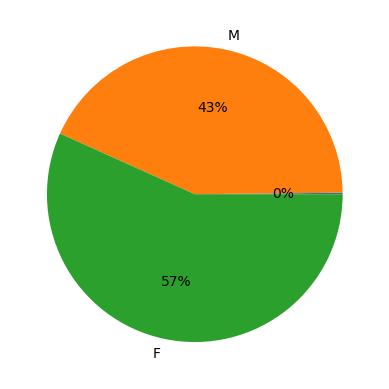

In [46]:
def make_pieplot(column):
    val_count_gender = join_df[column].value_counts()
    plt.pie(val_count_gender['count'].to_list(), labels = val_count_gender[column].to_list(), autopct='%1.0f%%', )
    plt.show()

make_pieplot('MEM_GENDER')

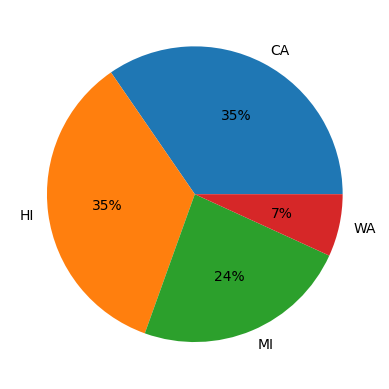

In [47]:
make_pieplot('MEM_STATE')

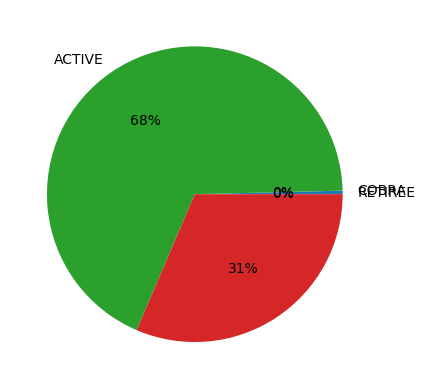

In [48]:
make_pieplot('MEM_STAT')

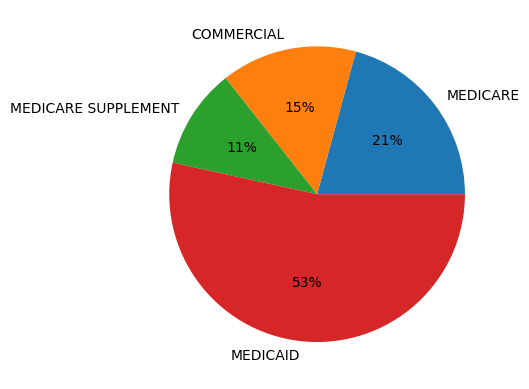

In [52]:
make_pieplot('PAYER_LOB')

In [76]:
join_df['MS_DRG'].value_counts().sort(by = 'count', descending = True)

MS_DRG,count
str,u32
"""SNF""",1518990
"""871""",982239
"""807""",644573
"""291""",346685
"""872""",324275
…,…
"""756""",37
"""136""",34
"""624""",33


In [75]:
join_df['ADM_SRC'].value_counts().sort(by = 'count', descending = True)

ADM_SRC,count
str,u32
"""1""",9713658
null,6715671
"""4""",1416065
"""2""",815280
"""5""",526423
…,…
"""6""",90385
"""D""",89676
"""E""",11538


In [69]:
join_df['ADM_TYPE'].value_counts().sort(by = 'count', descending = True)

ADM_TYPE,count
i32,u32
1,7732168
null,6611750
3,2738295
2,1704465
9,426403
5,408729


In [72]:
join_df['DIS_STAT'].value_counts().sort(by = 'count', descending = True)

DIS_STAT,count
i32,u32
1,9639112
null,2922371
6,2315408
3,1792871
30,1139236
…,…
83,1320
9,996
66,578


In [71]:
join_df['DIAG_CCS_1_LABEL'].value_counts().sort(by = 'count', descending = True)[:10]

DIAG_CCS_1_LABEL,count
str,u32
"""DISEASES OF THE CIRCULATORY SY…",3249633
"""INJURY AND POISONING""",2118741
"""COMPLICATIONS OF PREGNANCY; CH…",1854753
"""INFECTIOUS AND PARASITIC DISEA…",1844748
null,1548449
"""DISEASES OF THE DIGESTIVE SYST…",1541298
"""DISEASES OF THE RESPIRATORY SY…",1465977
"""ENDOCRINE; NUTRITIONAL; AND ME…",1131358
"""MENTAL ILLNESS""",852635


In [7]:
join_df['DIAG_CCS_2_LABEL'].value_counts().sort(by = 'count', descending = True)[:10]

DIAG_CCS_2_LABEL,count
str,u32
"""BACTERIAL INFECTION""",1806170
null,1548449
"""DISEASES OF THE HEART""",1285921
"""HYPERTENSION""",890441
"""COMPLICATIONS""",801361
"""FRACTURES""",789469
"""CEREBROVASCULAR DISEASE""",788553
"""COMPLICATIONS MAINLY RELATED T…",761829
"""DISEASES OF THE URINARY SYSTEM""",712511


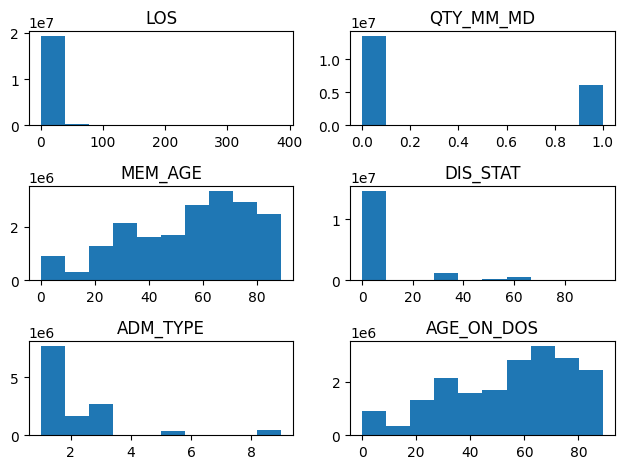

In [51]:
fig,axes = plt.subplots(3,2)
target_li = ['LOS', 'QTY_MM_MD', 'MEM_AGE', 'DIS_STAT', 'ADM_TYPE', 'AGE_ON_DOS']

for i in range(6):
    name_col = target_li[i]
    axes[i // 2, i % 2].hist(join_df[name_col])
    axes[i // 2, i % 2].set_title(name_col)

fig.tight_layout()

## Data Preprocessing

In [50]:
train_data_index = int(len(join_df) * 0.85)

train = join_df[:train_data_index]
test = join_df[train_data_index:]

In [51]:
def preprocessing_data(train, test):
    def preprocess_data(df, train_age):
        return df.with_columns([
            pl.when(pl.col('MEM_GENDER') == 'M').then(1).otherwise(0).alias('MEM_GENDER'),
            df['ADM_SRC'].fill_null('9').alias('ADM_SRC'),
            df['MEM_AGE'].fill_null(train_age).alias('MEM_AGE'),
            df['DIAG_CCS_2_LABEL'].fill_null('Unknown').alias('DIAG_CCS_2_LABEL'),
            df['DIAG_CCS_1_LABEL'].fill_null('Unknown').alias('DIAG_CCS_1_LABEL'),
            df['PRIMARY_CHRONIC_CONDITION_ROLLUP_ID'].fill_null(-1).alias('PRIMARY_CHRONIC_CONDITION_ROLLUP_ID'),
            df['ADM_TYPE'].fill_null(0).alias('ADM_TYPE'),
            df['DIS_STAT'].fill_null(1).alias('DIS_STAT'),
            (pl.col("MEM_STATE") == "HI").cast(int).alias("State_HI"),
            (pl.col("MEM_STATE") == "MI").cast(int).alias("State_MI"),
            (pl.col("MEM_STATE") == "WA").cast(int).alias("State_WA"),
            (pl.col("MEM_STATE") == "CA").cast(int).alias("State_CA"),
        ])

    train_age = train['MEM_AGE'].median()
    
    train = preprocess_data(train, train_age)
    test = preprocess_data(test, train_age)
    
    encoder = TargetEncoder(smoothing=2, features_to_encode=["PAYER_LOB", "DIAG_CCS_1_LABEL",'DIAG_CCS_2_LABEL', "MS_DRG", "ADM_SRC"])
    train = encoder.fit_transform(x=train, y=train['LOS'])
    test = encoder.transform(x=test)
    
    # Drop unnecessary columns
    columns_to_drop = ['MEMBER_ID', 'MEM_STATE','PRIMARY_CHRONIC_CONDITION_ROLLUP_DESC','MEM_STAT','QTY_MM_MD']
    train = train.drop(columns_to_drop)
    test = test.drop(columns_to_drop)
    
    return train, test, encoder

# Call the function
train, test, encoder = preprocessing_data(train, test)


In [52]:
train.shape

(16678538, 15)

In [53]:
test.shape

(2943272, 15)

In [54]:
x_train, y_train = train.drop('LOS'), train['LOS']
x_test, y_test = test.drop('LOS'), test['LOS']

## Modelling

In [63]:
def evaluate_prediction(model,y_actual):
    y_pred = model.predict(x_test.to_numpy())
    
    print('MAE : ',mean_absolute_error(y_actual,y_pred))
    print('RMSE : ',mean_squared_error(y_actual, y_pred, squared = False))
    print('R2 : ',r2_score(y_actual, y_pred))

## Model 1

In [65]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(x_train.to_numpy(),y_train.to_numpy())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
evaluate_prediction(model,y_test.to_numpy())

MAE :  3.216842133709043
RMSE :  6.257464080737201
R2 :  0.6363303122054105


## Model 2 (Hyperparameter Tuning)

In [60]:
import optuna 

def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 12),          # Max depth of the tree
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 0.3),  # Learning rate
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),  # Number of trees
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),    # Subsample ratio
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),  # Feature subsample ratio
        'gamma': trial.suggest_float('gamma', 1e-5, 1.0),        # Regularization parameter
        'lambda': trial.suggest_float('lambda', 1e-5, 1.0),      # L2 regularization
        'alpha': trial.suggest_float('alpha', 1e-5, 1.0),        # L1 regularization
    }
    
    model = XGBRegressor(**param)
    model.fit(x_train.to_numpy(), y_train.to_numpy())
    
    y_pred = model.predict(x_test.to_numpy())
    mse = mean_squared_error(y_test.to_numpy(), y_pred, squared=False)
    
    return mse

study = optuna.create_study(direction='minimize') 
study.optimize(objective, n_trials=20)  # Run 20 trials

[I 2024-12-08 02:16:27,654] A new study created in memory with name: no-name-f3abd1b9-b78e-4f87-9d4d-51090671e1a4
[I 2024-12-08 02:19:51,575] Trial 0 finished with value: 7.83872381151567 and parameters: {'max_depth': 3, 'learning_rate': 0.17854360488648927, 'n_estimators': 403, 'subsample': 0.894662718043123, 'colsample_bytree': 0.6300622954419457, 'gamma': 0.4037301957402569, 'lambda': 0.8113198362177427, 'alpha': 0.47416083828210065}. Best is trial 0 with value: 7.83872381151567.
[I 2024-12-08 02:23:10,159] Trial 1 finished with value: 6.536546386872762 and parameters: {'max_depth': 6, 'learning_rate': 0.036446389698648454, 'n_estimators': 269, 'subsample': 0.8807459466260803, 'colsample_bytree': 0.6330494869800245, 'gamma': 0.8653021126660911, 'lambda': 0.7638959968867836, 'alpha': 0.12765960442657856}. Best is trial 1 with value: 6.536546386872762.
[I 2024-12-08 02:28:14,721] Trial 2 finished with value: 5.838747404416166 and parameters: {'max_depth': 5, 'learning_rate': 0.1543752

KeyboardInterrupt: 

In [68]:
print('RMSE : ',study.best_value)
print('BEST PARAMS : ',study.best_params)


RMSE :  4.481544387145114
BEST PARAMS :  {'max_depth': 9, 'learning_rate': 0.19531422151766314, 'n_estimators': 426, 'subsample': 0.9612401026372714, 'colsample_bytree': 0.5691420360030488, 'gamma': 0.5223798562662106, 'lambda': 0.14785754105062546, 'alpha': 0.7906679748923339}


In [69]:
model_2 = XGBRegressor(**study.best_params)
model_2.fit(x_train.to_numpy(),y_train.to_numpy())

XGBRegressor(alpha=0.7906679748923339, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5691420360030488, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.5223798562662106,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=0.14785754105062546,
             learning_rate=0.19531422151766314, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=426, n_jobs=None, ...)

In [70]:
evaluate_prediction(model_2,y_test.to_numpy())

MAE :  2.141755693612714
RMSE :  4.481544387145114
R2 :  0.8134626608614552


<BarContainer object of 14 artists>

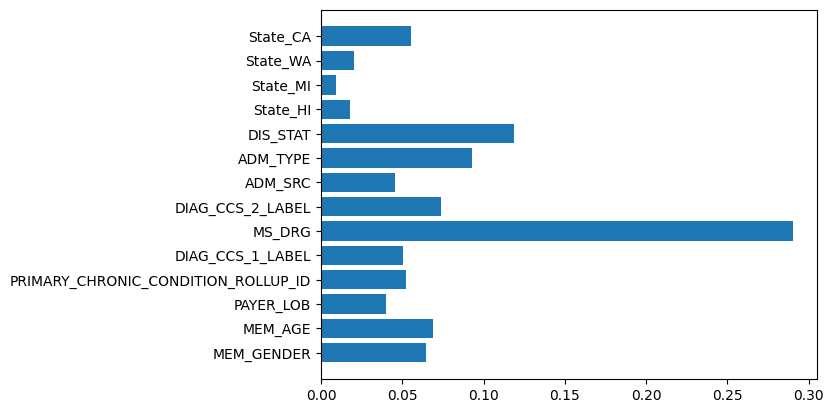

In [71]:
import matplotlib.pyplot as plt
plt.barh(x_train.columns , model_2.feature_importances_)


## Deployment

In [77]:
import joblib

unique_diag_label = join_df['DIAG_CCS_1_LABEL'].unique().to_list()
unique_diag_label_2 = join_df['DIAG_CCS_2_LABEL'].unique().to_list()
chronic_condition = join_df['PRIMARY_CHRONIC_CONDITION_ROLLUP_DESC'].unique().to_list()
ms_drg = join_df['MS_DRG'].unique().to_list()
adm_src = join_df['ADM_SRC'].unique().to_list()

joblib.dump(unique_diag_label, 'unique_diag_label.pkl')
joblib.dump(unique_diag_label_2, 'unique_diag_label_2.pkl')
joblib.dump(chronic_condition, 'chronic_condition.pkl')
joblib.dump(ms_drg, 'ms_drg.pkl')
joblib.dump(adm_src, 'adm_src.pkl')

joblib.dump(model,'xgboost.pkl')
joblib.dump(encoder,'target_encoder.pkl')

['target_encoder.pkl']